In [1]:
import os
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from dask import dataframe as dd

from multiprocessing import cpu_count
nCores = cpu_count()

#### Find number of CPU Cores availiable

In [2]:
nCores

4

#### Check file size (GB)

In [3]:
spotify_streams_filename = "Spotify_Daily_Streaming.csv"

In [4]:
os.path.getsize(spotify_streams_filename)/(1000*1000*1000)

0.940954645

In [5]:
df = pd.read_csv(spotify_streams_filename)

In [6]:
df = df.dropna(how='any')

In [7]:
df.head(5)

,Date,Track URL,Position,Track Name,Artist,Streams,Country
1,7/31/2018,https://open.spotify.com/track/77wz2VtAwxAwYOG...,1,"Miljonair (feat. SBMG, Lil' Kleine, Boef & Ron...",$hirak,238729,Netherlands
2,8/2/2018,https://open.spotify.com/track/77wz2VtAwxAwYOG...,1,"Miljonair (feat. SBMG, Lil' Kleine, Boef & Ron...",$hirak,245639,Netherlands
3,7/23/2017,https://open.spotify.com/track/6mw02h3qbWmuq2b...,1,Millionär,187 Strassenbande,387632,Germany
4,6/29/2018,https://open.spotify.com/track/2iUXsYOEPhVqEBw...,1,Youngblood,5 Seconds of Summer,261795,Australia
5,6/11/2018,https://open.spotify.com/track/55S2PQgSMYAhgoT...,1,Youngblood,5 Seconds of Summer,276266,Australia


In [8]:
def getRowCountOfDf(df):
    data_desc = df.describe()
    row_count = int(data_desc.Position[0])
    print(f'{row_count:,}')
    return row_count

In [9]:
row_count = getRowCountOfDf(df)

8,466,353


In [10]:
ddf = dd.read_csv(spotify_streams_filename)

In [11]:
ddf = ddf.dropna(how='any')

In [12]:
# ddf = ddf.set_index('Date', npartitions=nCores*2)

In [13]:
def getRowCountOfDaskDf(ddf):
    data_desc = ddf.describe().compute()
    row_count = int(data_desc.Position[0])
    print(f'{row_count:,}')
    return row_count

In [14]:
full_row_count = getRowCountOfDaskDf(ddf)

8,466,353


In [15]:
%%time
df = ddf.nlargest(n=2000, columns=("Streams")).compute()

CPU times: user 14.4 s, sys: 2.49 s, total: 16.8 s
Wall time: 12 s


In [16]:
row_count = getRowCountOfDf(df)

2,000


In [17]:
df = df.drop_duplicates(['Track Name'])

In [18]:
row_count_drop_dupes = getRowCountOfDf(df)

140


In [19]:
ddf_norway = ddf[(ddf.Country == "Norway")]

In [20]:
norway_row_count = getRowCountOfDaskDf(ddf_norway)

181,785


In [21]:
df = ddf_norway.compute()

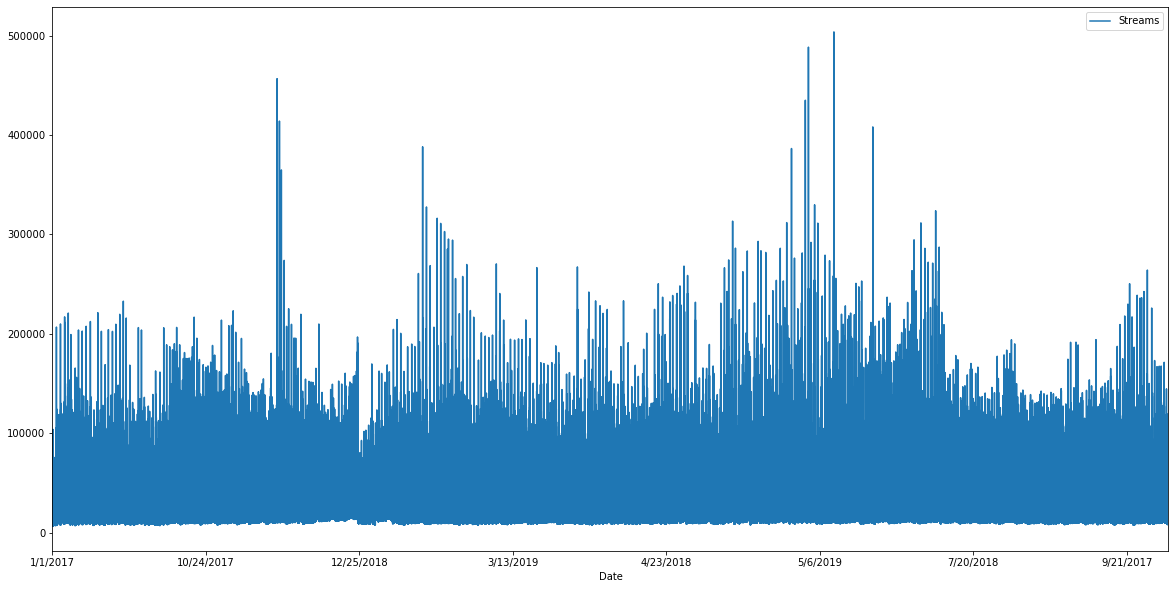

In [23]:
df.sort_values(by="Date").plot(x="Date", y='Streams', figsize=(20,10))